In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
countries = ['IT', 'ES']

path_datasets = '/Users/anjasjostrom/Documents/git_repos/eth_datathon_2025_alpiq/data/1_original/OneDrive_2025-04-05/Alpiq ETHdatathon challenge 2025/datasets2025/'

path_historical_metering = path_datasets + 'historical_metering_data_'
path_rollout = path_datasets + 'rollout_data_'
path_spv = path_datasets + 'spv_ec00_forecasts_'
path_holidays = path_datasets + 'holiday_'
path_example = path_datasets + 'example_set_'

In [3]:
def decompose_DATETIME(df, colname = 'DATETIME'):
    df['year'] = df[colname].map(lambda x: x[:4])
    df['month'] = df[colname].map(lambda x: x[5:7])
    df['day'] = df[colname].map(lambda x: x[8:10])
    df['time'] = df[colname].map(lambda x: x[11:])

    return df

Rollout = self declared forecast from the consumers \
spv forecasts = spv\
historical metering = target variable

Italy exploration

1696 customers

In [4]:
IT_historical_metering_df = pd.read_csv(path_historical_metering + 'IT.csv', sep = ',')
ES_historical_metering_df = pd.read_csv(path_historical_metering + 'ES.csv', sep = ',')

IT_historical_metering_df = decompose_DATETIME(IT_historical_metering_df)
ES_historical_metering_df = decompose_DATETIME(ES_historical_metering_df)

In [5]:
IT_rollout_df = pd.read_csv(path_rollout + 'IT.csv', sep = ',')
ES_rollout_df = pd.read_csv(path_rollout + 'ES.csv', sep = ',')

IT_rollout_df = decompose_DATETIME(IT_rollout_df)
ES_rollout_df = decompose_DATETIME(ES_rollout_df)

In [6]:
IT_spv_df = pd.read_csv(path_spv + 'it.csv', sep = ';')
ES_spv_df = pd.read_csv(path_spv + 'es.csv', sep = ';')

IT_spv_df = decompose_DATETIME(IT_spv_df, colname = 'date')
ES_spv_df = decompose_DATETIME(ES_spv_df, colname = 'date')

Report na and inf values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


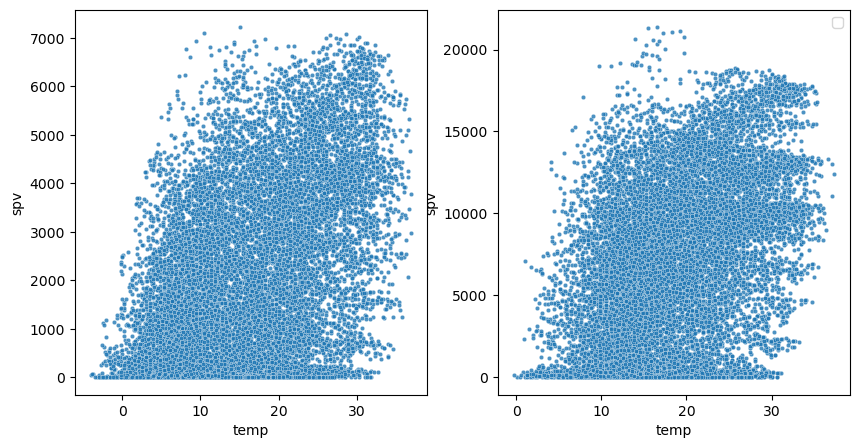

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
#sns.lineplot(spv_df, x = spv_df.index, y = 'temp', color = 'orange', ax = ax1)
#sns.lineplot(spv_df, x = spv_df.index, y = 'spv', color = 'blue', ax = ax2)

sns.scatterplot(IT_spv_df[IT_spv_df['spv'] != 0], x = 'temp', y = 'spv',s = 10, alpha = 0.8, ax = ax1)
sns.scatterplot(ES_spv_df[ES_spv_df['spv'] != 0], x = 'temp', y = 'spv',s = 10, alpha = 0.8, ax = ax2)

plt.legend()

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: >

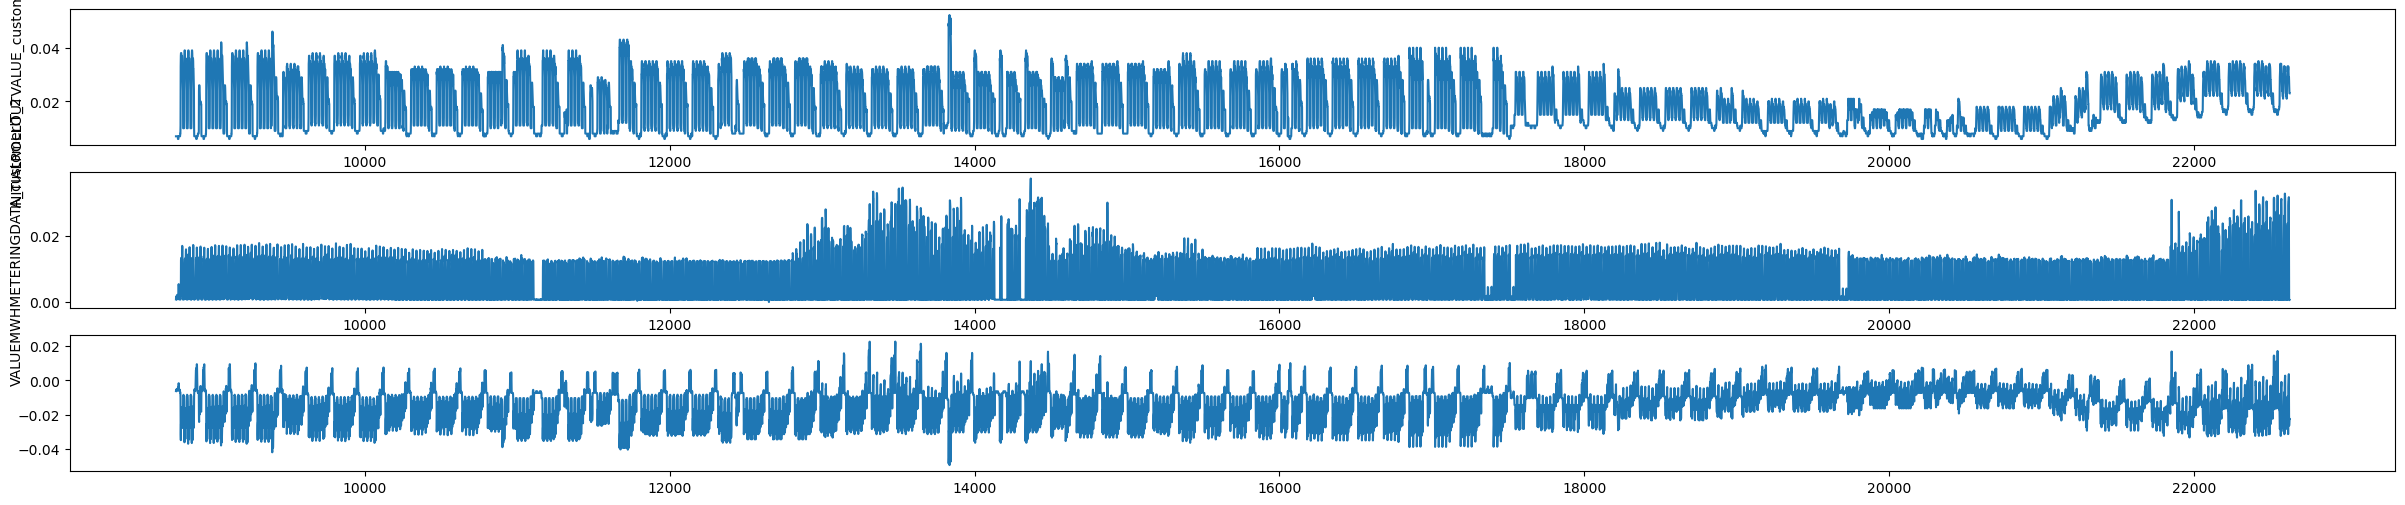

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize = (30,6))

customer = 'customerIT_2'
initial_rollout_customer = 'INITIALROLLOUTVALUE_' + customer
historical_metering_customer = 'VALUEMWHMETERINGDATA_' + customer

sns.lineplot(IT_rollout_df[~((IT_rollout_df['month'] == '08') & (IT_rollout_df['year'] == '2024'))][initial_rollout_customer], errorbar = None, ax = ax1)
sns.lineplot(IT_historical_metering_df[historical_metering_customer], errorbar = None, ax = ax2)
sns.lineplot((IT_historical_metering_df[historical_metering_customer] - IT_rollout_df[~((IT_rollout_df['month'] == '08') & (IT_rollout_df['year'] == '2024'))][initial_rollout_customer]), ax = ax3)

Cluster companies based on their concordance to their rollouts and inform feature weights based on the cluster\
A more concordant group can give bigger weights to the rollout feature

Cluster residual noise per customer wrt to its initila rollout

Basic features italy

In [9]:
IT_spv_df_train = IT_spv_df[:22629]
IT_rollout_df_train = IT_rollout_df[:22629]

In [10]:
df_train = pd.DataFrame({'year': IT_historical_metering_df['year'], 
                         'month': IT_historical_metering_df['month'], 
                         'day': IT_historical_metering_df['day'],
                         'time': IT_historical_metering_df['time'],
                         'pv': IT_spv_df_train['spv'], 
                         'rollout': IT_rollout_df_train['INITIALROLLOUTVALUE_customerIT_1'], 
                         'temp': IT_spv_df_train['temp'], 
                         'y': IT_historical_metering_df['VALUEMWHMETERINGDATA_customerIT_1']})

In [11]:
X = df_train.dropna().drop(['y'], axis = 1).to_numpy()
y = df_train.dropna()['y'].to_numpy()

What can we share between the countries and what can we not?

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
from scipy.fft import fft

In [15]:
fft_data = np.fft.fft(IT_historical_metering_df['VALUEMWHMETERINGDATA_customerIT_2'].dropna())

In [16]:
fft_data.real

array([78.028428  , -0.93544017,  2.50116424, ...,  6.33325536,
        2.50116424, -0.93544017])

In [17]:
IT_historical_metering_df['VALUEMWHMETERINGDATA_customerIT_2']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
22624    0.012574
22625    0.000676
22626    0.000750
22627    0.000700
22628    0.000675
Name: VALUEMWHMETERINGDATA_customerIT_2, Length: 22629, dtype: float64

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: >

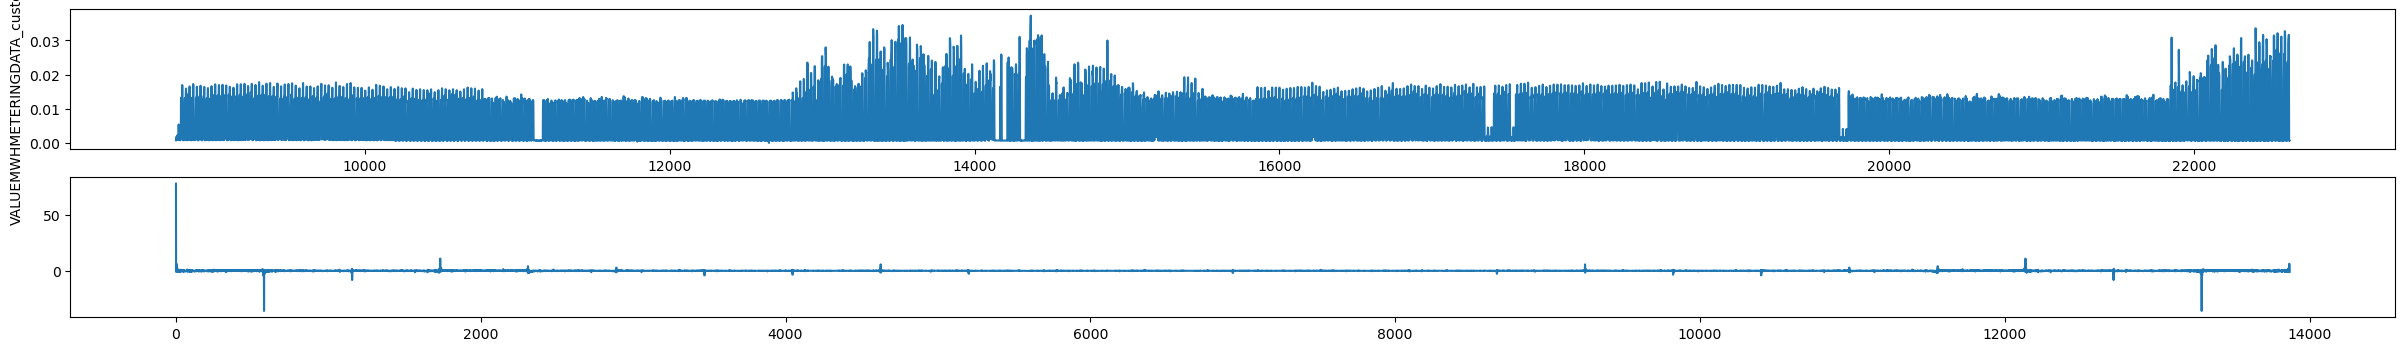

In [18]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (30,4))
sns.lineplot(IT_historical_metering_df['VALUEMWHMETERINGDATA_customerIT_2'], ax = ax1)
sns.lineplot(fft_data.real, ax = ax2)

In [69]:
customers_ES = ES_historical_metering_df.drop(['DATETIME', 'year', 'month', 'day', 'time'], axis = 1).columns
customers_IT = IT_historical_metering_df.drop(['DATETIME', 'year', 'month', 'day', 'time'], axis = 1).columns

In [70]:
df_IT = IT_historical_metering_df[customers_IT].apply(lambda x: np.fft.fft(x.fillna(0)).real,axis = 0)
df_ES = ES_historical_metering_df[customers_ES].apply(lambda x: np.fft.fft(x.fillna(0)).real,axis = 0)

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca_IT = PCA(n_components=2)
pca_IT.fit(df_IT)

pca_ES = PCA(n_components=2)
pca_ES.fit(df_ES)

PCA(n_components=2)

In [73]:
pca_ES.explained_variance_ratio_

array([0.94896311, 0.01682693])

In [74]:
pca_IT.explained_variance_ratio_

array([0.84581401, 0.03531462])

In [75]:
from sklearn.cluster import KMeans

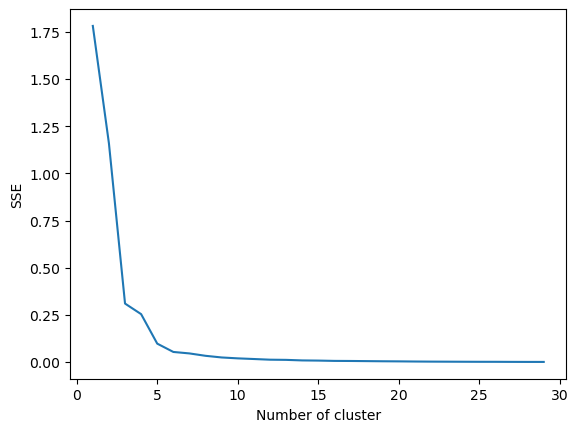

In [76]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(pca_ES.components_.T)

sse = {}

for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca.components_.T)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [80]:
kmeans_IT = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(pca_IT.components_.T)
kmeans_ES = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(pca_ES.components_.T)

<Axes: >

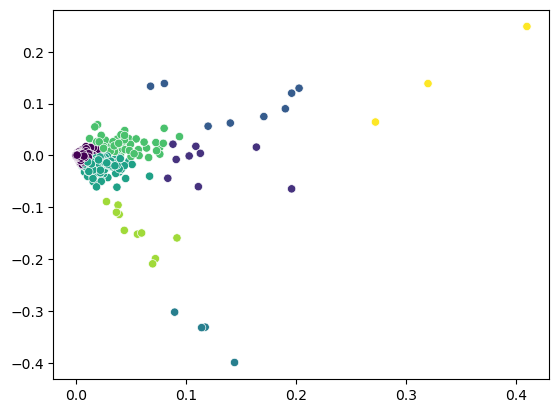

In [82]:
sns.scatterplot(x = pca_IT.components_[0,], y = pca_IT.components_[1,], c = kmeans_IT.labels_)

<Axes: >

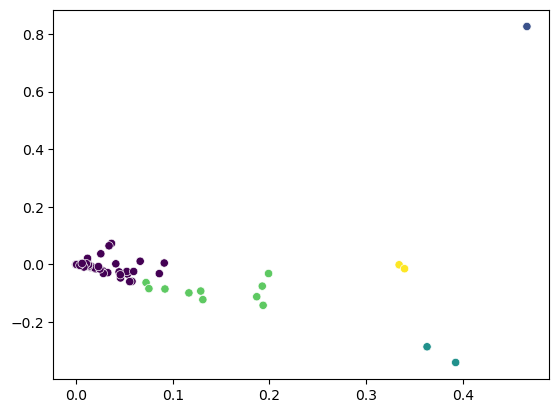

In [84]:
sns.scatterplot(x = pca_ES.components_[0,], y = pca_ES.components_[1,], c = kmeans_ES.labels_)

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

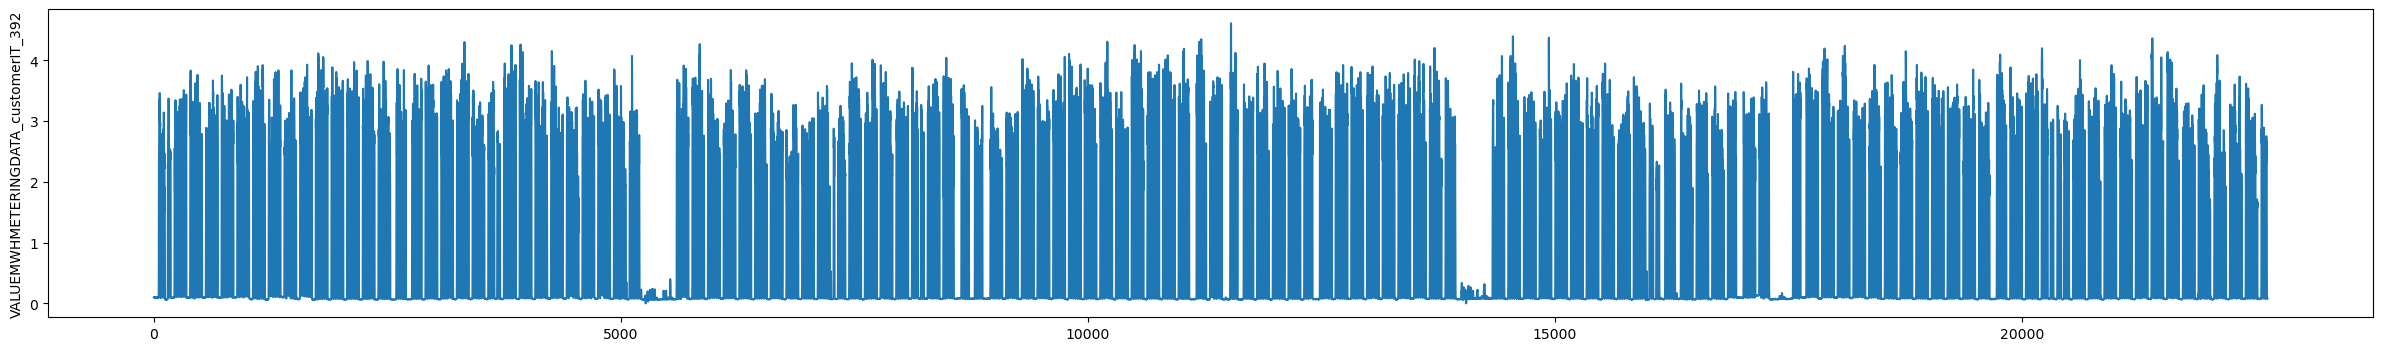

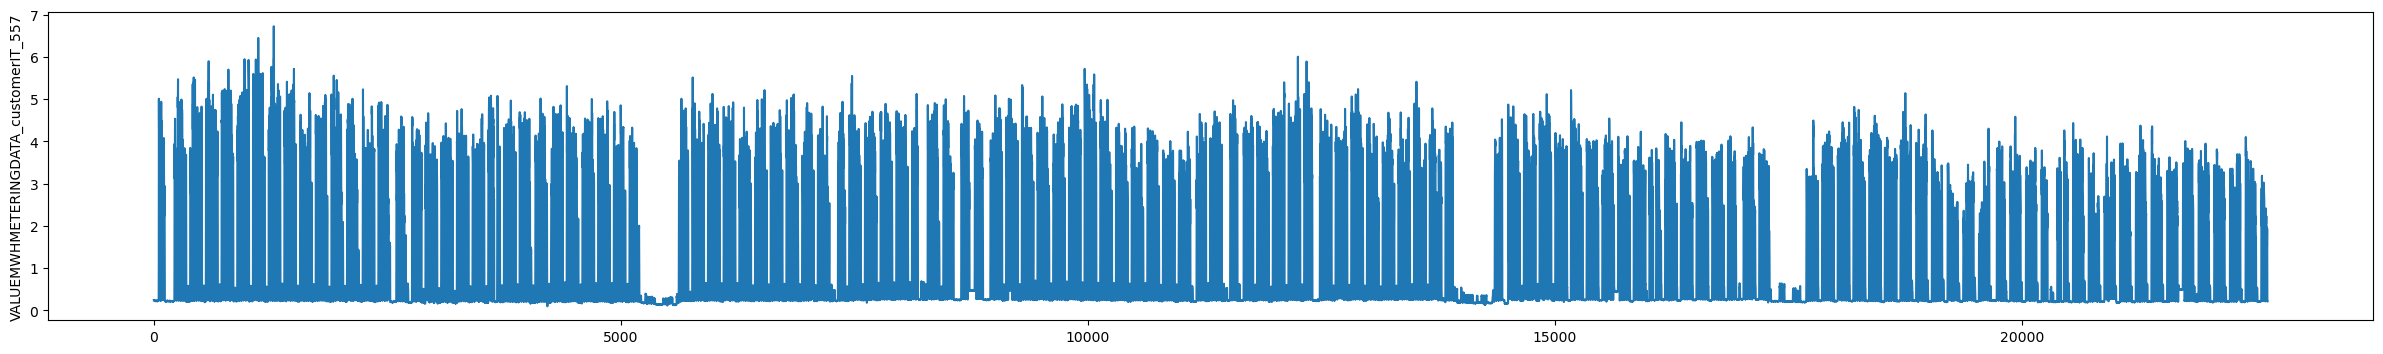

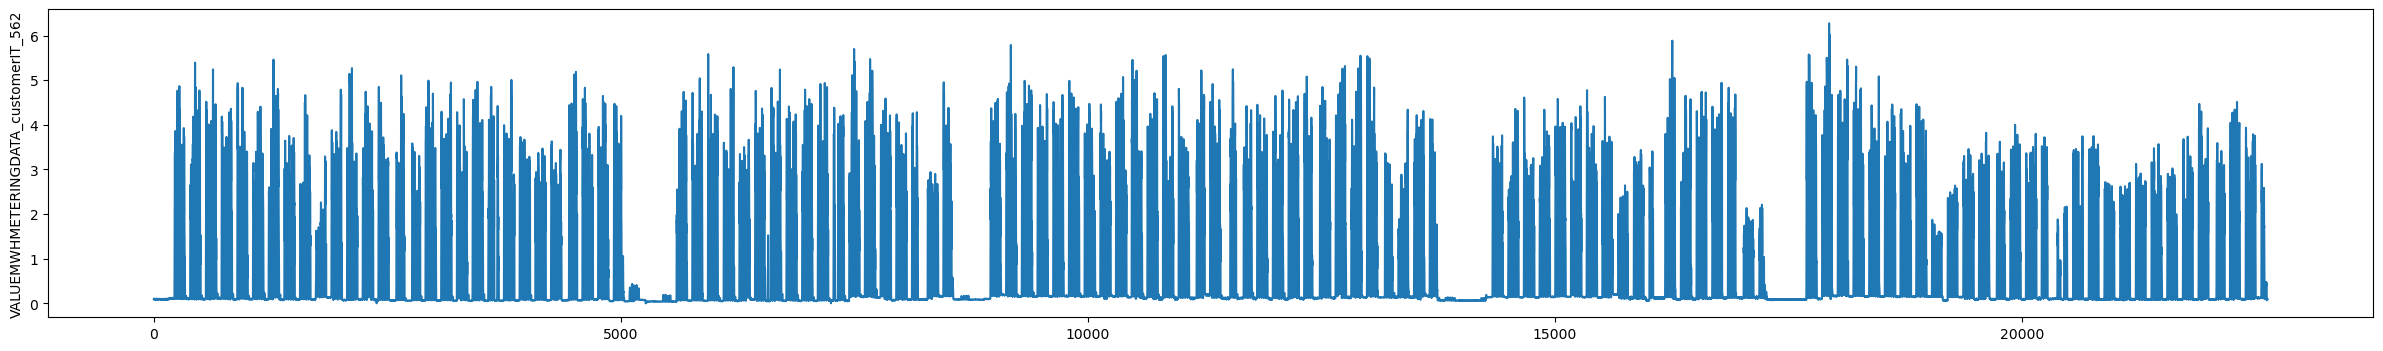

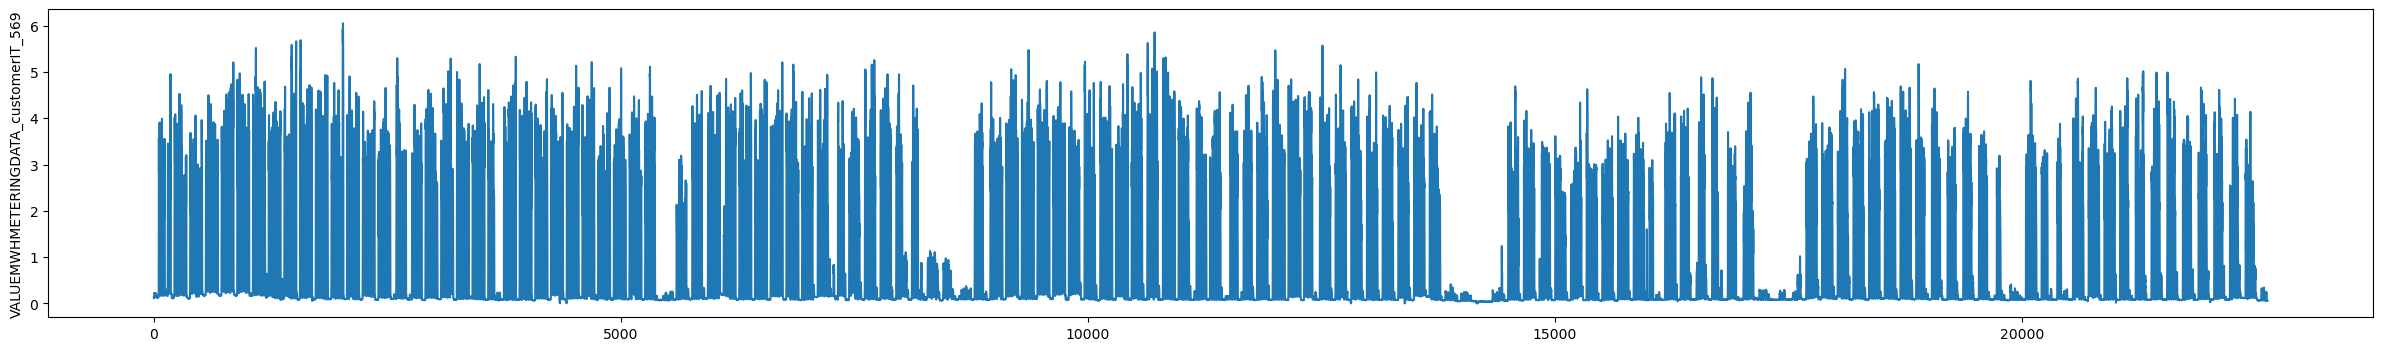

In [85]:
for i in range(0,len(customers_IT)):
    if kmeans_IT.labels_[i] == 3:
        fig, ax1 = plt.subplots(1,1,figsize = (30,4))
        sns.lineplot(IT_historical_metering_df[customers_IT[i]], ax = ax1)

In [122]:
customer_clusters_ES = []
for i in range(max(kmeans_ES.labels_) + 1):
    customer_clusters_ES.append([customer for j, customer in enumerate(customers_ES) if kmeans_ES.labels_[j] == i])

customer_clusters_IT = []
for i in range(max(kmeans_IT.labels_) + 1):
    customer_clusters_IT.append([customer for j, customer in enumerate(customers_IT) if kmeans_IT.labels_[j] == i])

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

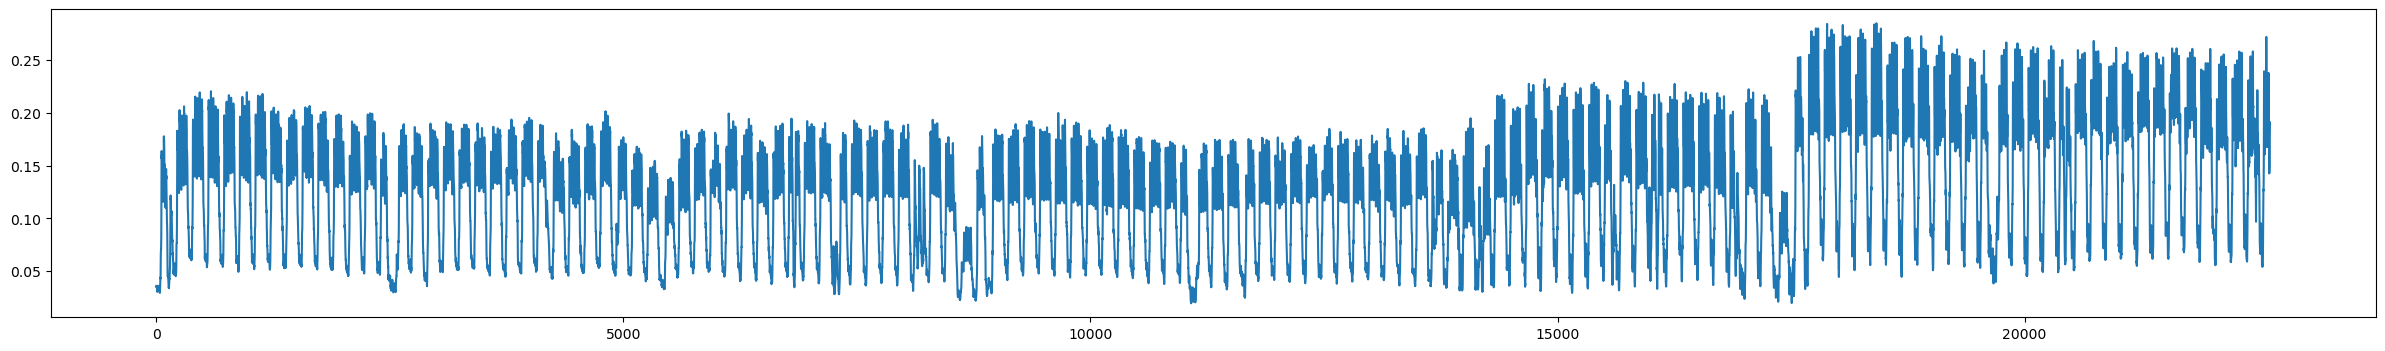

In [117]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(ES_historical_metering_df[customer_clusters_ES[0]].mean(axis = 1))

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

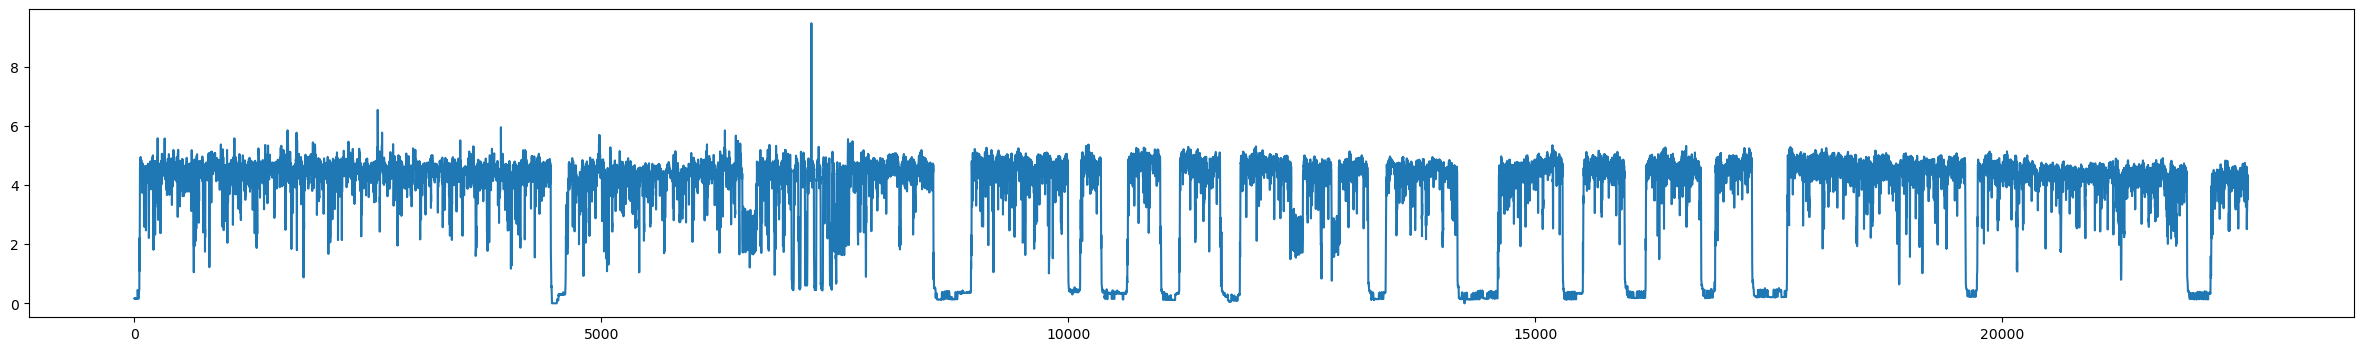

In [118]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(ES_historical_metering_df[customer_clusters_ES[1]].mean(axis = 1))

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

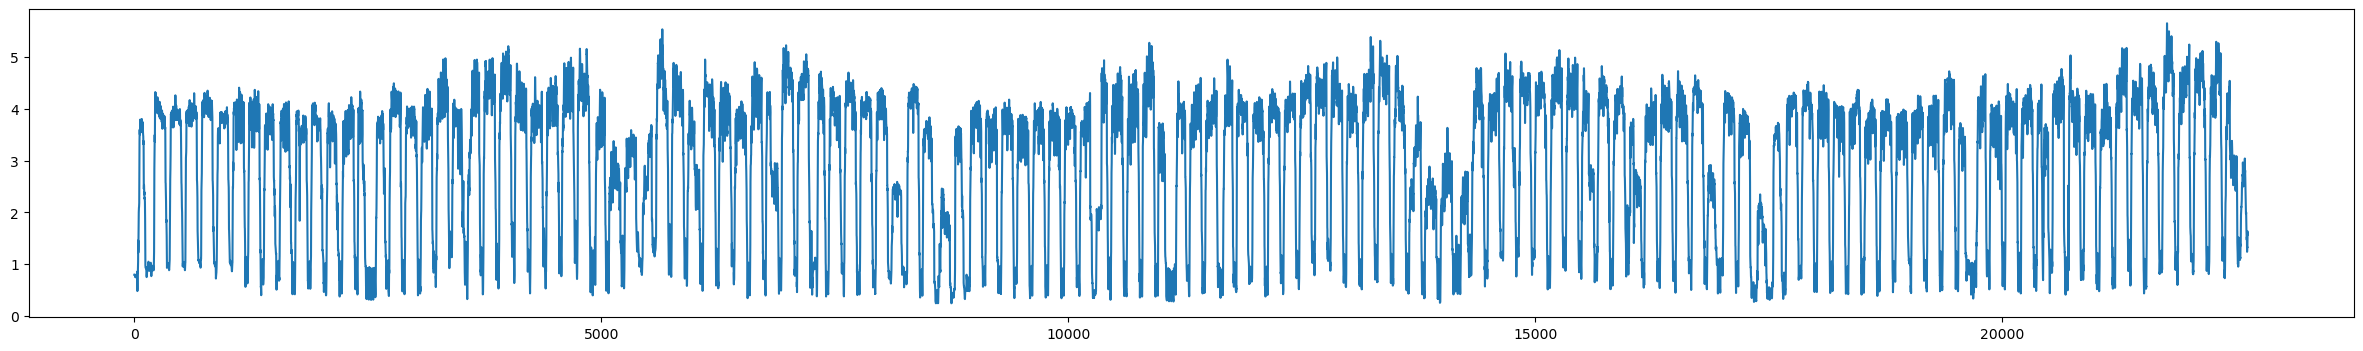

In [119]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(ES_historical_metering_df[customer_clusters_ES[2]].mean(axis = 1))

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

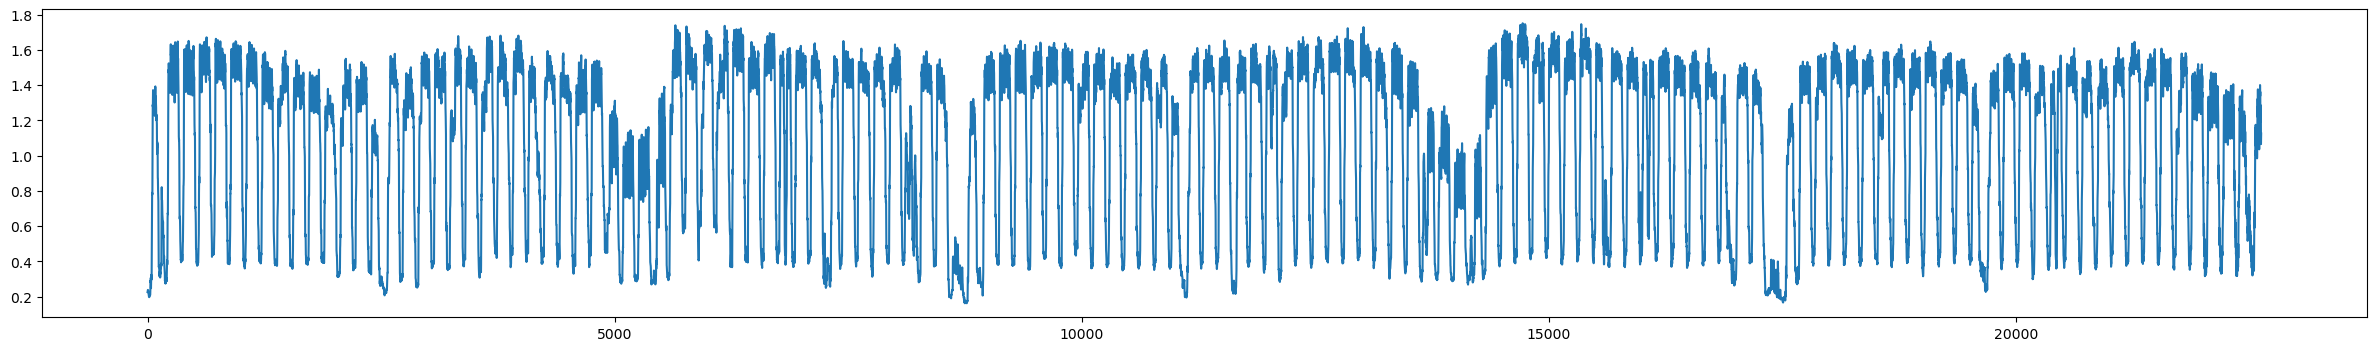

In [120]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(ES_historical_metering_df[customer_clusters_ES[3]].mean(axis = 1))

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

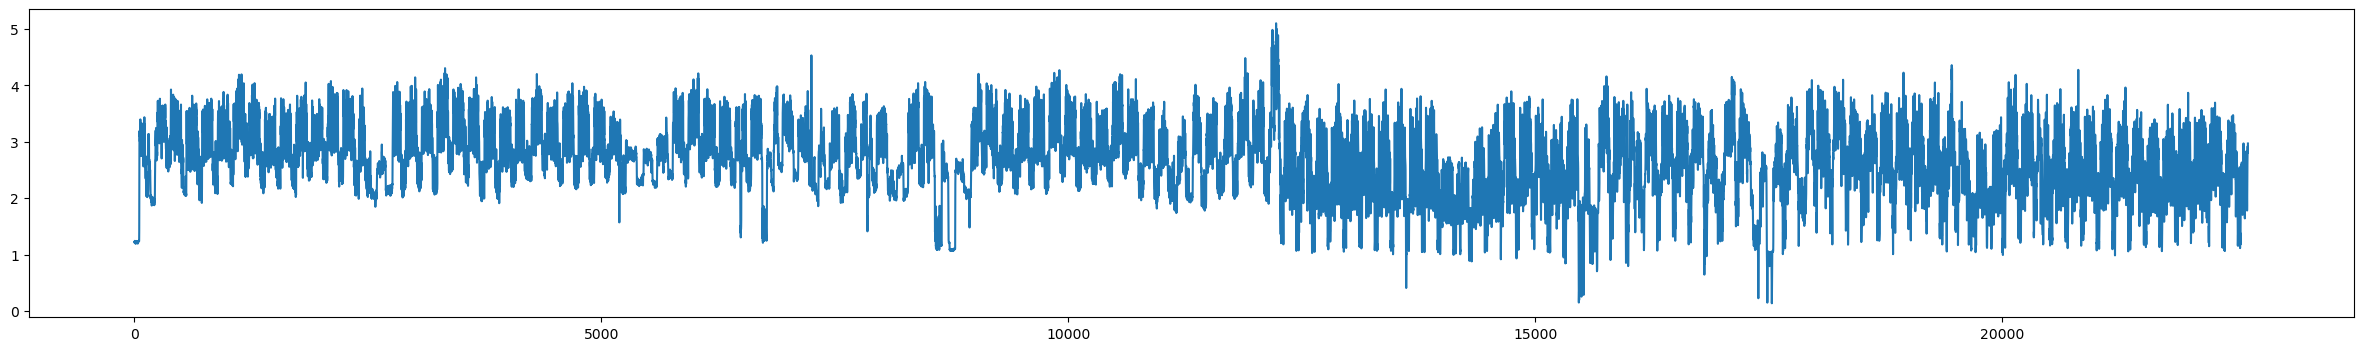

In [121]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(ES_historical_metering_df[customer_clusters_ES[4]].mean(axis = 1))

/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anjasjostrom/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

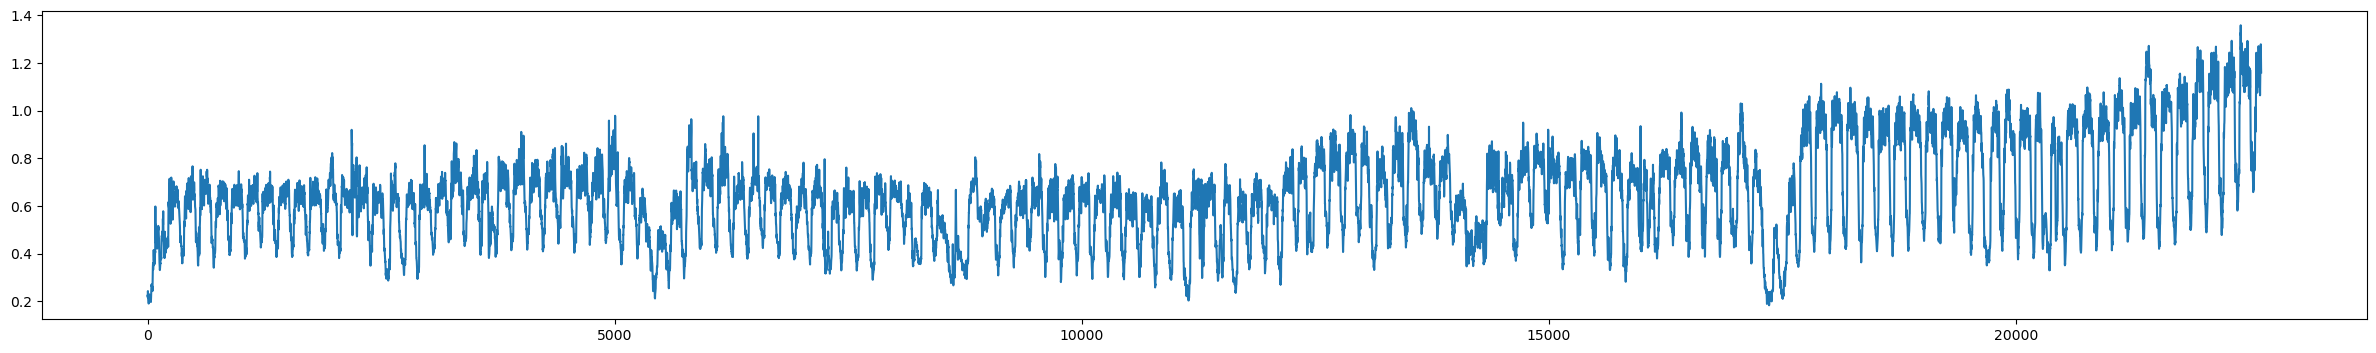

In [129]:
fig, ax = plt.subplots(1,1, figsize = (30,4))
sns.lineplot(IT_historical_metering_df[customer_clusters_IT[5]].mean(axis = 1))